# 查看MTL的测试结果

在jupyter里把跑的结果绘图表达出来，看效果比较方便。

## mtl with wbloss

有water balance loss的结果和没有的进行比较

In [1]:
import os
import sys
from pathlib import Path

sys.path.append(os.path.dirname(Path(os.path.abspath('')).parent.parent))

In [2]:
import definitions
from hydroSPB.app.streamflow_utils import (
    get_json_file,
    get_lastest_weight_path
)
from hydroSPB.hydroDL.trainer import stat_result
from hydroSPB.app.multi_task.mtl_results_utils import predict_new_mtl_exp

Please Check your directory:
ROOT_DIR of the repo:  /mnt/data/owen411/code/HydroSPB
DATA_SOURCE_DIR of the repo:  /mnt/data/owen411/data


/mnt/data/owen411/program/miniconda3/envs/HydroSPB22/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cfg_dir_q = os.path.join(
        definitions.ROOT_DIR, "hydroSPB", "example", "camels", "exp41501"
    )
cfg_q = get_json_file(cfg_dir_q)
inds_df_q, pred_q, obs_q = stat_result(
        cfg_q["data_params"]["test_path"],
        cfg_q["evaluate_params"]["test_epoch"],
        fill_nan=cfg_q["evaluate_params"]["fill_nan"],
        unit="ft3/s",
        return_value=True,
    )

divide by zero encountered in double_scalars


In [8]:
import numpy as np
np.median(inds_df_q["NSE"][0])

0.693430384705928

In [9]:
import numpy as np
np.median(inds_df_q["NSE"][1])

-0.2535357148077777

这几个结果，最后反归一化的时候有点问题了，所以要把结果重新生成下。

训练的时候是对的，就是之前的代码bug了，测试的结果有点问题，现在修正后，需要重新跑一下。

已经跑过这个代码了，并且也已经修复过代码了，所以这里就注释掉了：

In [4]:
# mtl_q_et_exps = ["exp443", "exp444"]
# weight_path_dir = [
#     os.path.join(definitions.ROOT_DIR, "hydroSPB", "example", "camels", exp)
#     for exp in mtl_q_et_exps
# ]
# weight_path = [get_lastest_weight_path(dir_) for dir_ in weight_path_dir]
# cache_path = os.path.join(
#     definitions.ROOT_DIR,
#     "hydroSPB",
#     "example",
#     "camels",
#     "exp441",
# )
# gage_id_file = os.path.join(
#     definitions.ROOT_DIR,
#     "hydroSPB",
#     "example",
#     "camels",
#     "camels_us_mtl_2001_2021_flow_screen.csv",
# )
# predict_new_mtl_exp(
#     exp="exp443",
#     targets=["usgsFlow", "ET"],
#     loss_weights=[0.5, 0.5],
#     weight_path=weight_path[0],
#     train_period=["2001-10-01", "2006-10-01"],
#     test_period=["2006-10-01", "2011-10-01"],
#     cache_path=cache_path,
#     gage_id_file=gage_id_file,
#     scaler_params={
#         "basin_norm_cols": ["usgsFlow", "ET"],
#         "gamma_norm_cols": [
#             "prcp",
#             "pr",
#             "total_precipitation",
#             "pre",
#             # pet may be negative, but we set negative as 0 because of gamma_norm_cols
#             # https://earthscience.stackexchange.com/questions/12031/does-negative-reference-evapotranspiration-make-sense-using-fao-penman-monteith
#             "pet",
#             "potential_evaporation",
#         ],
#     },
#     loss_func="MultiOutWaterBalanceLoss",
#     alpah=0.25
# )
# predict_new_mtl_exp(
#     exp="exp444",
#     targets=["usgsFlow", "ET"],
#     loss_weights=[0.5, 0.5],
#     weight_path=weight_path[1],
#     train_period=["2001-10-01", "2006-10-01"],
#     test_period=["2006-10-01", "2011-10-01"],
#     cache_path=cache_path,
#     gage_id_file=gage_id_file,
#     scaler_params={
#         "basin_norm_cols": ["usgsFlow", "ET"],
#         "gamma_norm_cols": [
#             "prcp",
#             "pr",
#             "total_precipitation",
#             "pre",
#             # pet may be negative, but we set negative as 0 because of gamma_norm_cols
#             # https://earthscience.stackexchange.com/questions/12031/does-negative-reference-evapotranspiration-make-sense-using-fao-penman-monteith
#             "pet",
#             "potential_evaporation",
#         ],
#     },
#     loss_func="MultiOutWaterBalanceLoss",
#     alpah=0.1
# )

In [7]:
cfg_dir_no_wbloss = os.path.join(
        definitions.ROOT_DIR, "hydroSPB", "example", "camels", "exp441"
    )
cfg_no_wbloss = get_json_file(cfg_dir_no_wbloss)
inds_df_no_wbloss, pred_no_wbloss, obs_no_wbloss = stat_result(
        cfg_no_wbloss["data_params"]["test_path"],
        cfg_no_wbloss["evaluate_params"]["test_epoch"],
        fill_nan=cfg_no_wbloss["evaluate_params"]["fill_nan"],
        unit=["ft3/s", None],
        return_value=True,
    )

divide by zero encountered in double_scalars


In [19]:
cfg_dir_wbloss_alpha25 = os.path.join(
        definitions.ROOT_DIR, "hydroSPB", "example", "camels", "exp443"
    )
cfg_wbloss_alpha25 = get_json_file(cfg_dir_wbloss_alpha25)
inds_df_wbloss_alpha25, pred_wbloss_alpha25, obs_wbloss_alpha25 = stat_result(
        cfg_wbloss_alpha25["data_params"]["test_path"],
        cfg_wbloss_alpha25["evaluate_params"]["test_epoch"],
        fill_nan=cfg_wbloss_alpha25["evaluate_params"]["fill_nan"],
        unit=["ft3/s", None],
        return_value=True,
    )

divide by zero encountered in double_scalars


In [23]:
cfg_dir_wbloss_alpha10 = os.path.join(
        definitions.ROOT_DIR, "hydroSPB", "example", "camels", "exp444"
    )
cfg_wbloss_alpha10 = get_json_file(cfg_dir_wbloss_alpha10)
inds_df_wbloss_alpha10, pred_wbloss_alpha10, obs_wbloss_alpha10 = stat_result(
        cfg_wbloss_alpha10["data_params"]["test_path"],
        cfg_wbloss_alpha10["evaluate_params"]["test_epoch"],
        fill_nan=cfg_wbloss_alpha10["evaluate_params"]["fill_nan"],
        unit=["ft3/s", None],
        return_value=True,
    )

divide by zero encountered in double_scalars


In [17]:
inds_df_no_wbloss["NSE"]

0    [0.7586497198613131, 0.8000323939061758, 0.665...
1    [0.957507908431722, 0.9742499962100305, 0.9634...
Name: NSE, dtype: object

In [20]:
inds_df_wbloss_alpha25["NSE"]

0    [0.5558863734245123, 0.792581907898044, 0.6564...
1    [0.9691200324777088, 0.9561520018054281, 0.963...
Name: NSE, dtype: object

In [24]:
inds_df_wbloss_alpha10["NSE"]

0    [0.7441676256142896, 0.8308961440107514, 0.583...
1    [0.961792039703987, 0.9573787100249149, 0.9637...
Name: NSE, dtype: object

In [11]:
import numpy as np
import pandas as pd

In [12]:
np.median(inds_df_no_wbloss["NSE"][0])

0.6653472294909959

In [13]:
np.median(inds_df_no_wbloss["NSE"][1])

0.9055395525659874

In [25]:
np.median(inds_df_wbloss_alpha25["NSE"][0])

0.6356482661735989

In [26]:
np.median(inds_df_wbloss_alpha25["NSE"][1])

0.8934013278677925

In [27]:
np.median(inds_df_wbloss_alpha10["NSE"][0])

0.6621298859382507

In [29]:
from hydroSPB.data.source_pro.data_camels_pro import CamelsPro

这591个站点的编号：

In [30]:
camels591_file="../../example/camels/camels_us_mtl_2001_2021_flow_screen.csv"
# if false, run camels_multioutput_preprocess.py in this directory
os.path.isfile(camels591_file)

True

In [31]:
camels591_ids = pd.read_csv(camels591_file,dtype={'GAGE_ID':str})['GAGE_ID'].values
camels591_ids[:5]

array(['01013500', '01022500', '01030500', '01031500', '01047000'],
      dtype=object)

In [32]:
# 选取数据的时间段
# time_range = ["2001-10-01", "2021-10-01"]
time_range = ["2006-10-01", "2011-10-01"]

降雨数据是NLDAS的，所以读取NLDAS的降雨数据，用NLDAS CAMELS

In [33]:
source_path=[
            os.path.join(definitions.DATASET_DIR, "camelsflowet"),
            os.path.join(definitions.DATASET_DIR, "modiset4camels"),
            os.path.join(definitions.DATASET_DIR, "camels", "camels_us"),
            os.path.join(definitions.DATASET_DIR, "nldas4camels"),
            os.path.join(definitions.DATASET_DIR, "smap4camels"),
        ]
camels_pro = CamelsPro(source_path)

In [34]:
# precipitation from NLDAS 2
pet_prcps = camels_pro.read_relevant_cols(object_ids=camels591_ids, t_range_list=time_range,relevant_cols=["potential_evaporation", "total_precipitation"], forcing_type="nldas")

Read NLDAS forcing data for CAMELS-US: 100%|██████████| 591/591 [00:18<00:00, 32.08it/s]


pet和prcp的单位都是kg/m^2/day，用水的1000kg/m^3密度换算就是mm/day

In [35]:
pet = pet_prcps.mean(axis=1)[:, 0]
pet.shape

(591,)

In [36]:
p = pet_prcps.mean(axis=1)[:, 1]
p.shape

(591,)

In [37]:
flow_ets = camels_pro.read_target_cols(object_ids=camels591_ids, t_range_list=time_range,target_cols=["usgsFlow", "ET"])

Read MODIS ET data for CAMELS-US: 100%|██████████| 591/591 [00:05<00:00, 113.86it/s]


flow的单位是ft^3/s，需要用流域面积换算成mm/day；

ET的单位是0.1kg/m^2/8day，读取的时候已经计算到日平均了，所以是0.1kg/m^2/day，用水的1000kg/m^3密度换算也是0.1mm/day，
并且已经在读取的时候额外补充了乘以0.1，转变为mm/day了，因此也不必再转换了。

In [38]:
# 转换径流单位需要有流域面积
basin_areas = camels_pro.read_basin_area(object_ids=camels591_ids)

In [39]:
# 先转立方米每秒
flows = flow_ets[:, :, 0] / 35.314666721489
# 再用面积转成mm/day
flows = flows / basin_areas * 1e3 / 1e6 * 86400
flows.shape

(591, 1826)

In [40]:
q = np.nanmean(flows, axis=1)
q.shape

(591,)

In [41]:
ets = flow_ets[:, :, 1]

In [42]:
et = np.nanmean(ets,axis=1)
et.shape

(591,)

In [43]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

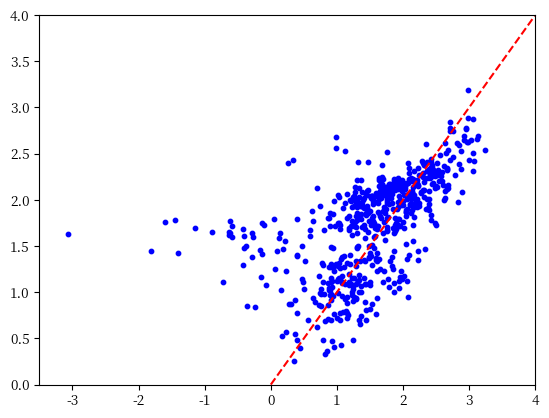

In [44]:
fig, ax = plt.subplots()
ax.scatter(p-q, et, c="blue", s=10)
xlim = [-3.5, 4]
ylim = [0, 4]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
line = mlines.Line2D([0, 4], [0, 4], color="red", linestyle="--")
ax.add_line(line)

In [45]:
q_mtl_no_wbloss = pred_no_wbloss[:, :, 0]
q_no_wbloss = q_mtl_no_wbloss.mean(axis=1)
q_no_wbloss.shape

(591,)

In [46]:
et_mtl_no_wbloss = pred_no_wbloss[:, :, 1]
et_no_wbloss = et_mtl_no_wbloss.mean(axis=1)
et_no_wbloss.shape

(591,)

In [47]:
q_mtl_wbloss = pred_wbloss_alpha10[:, :, 0]
q_wbloss = q_mtl_wbloss.mean(axis=1)
q_wbloss.shape

(591,)

In [48]:
et_mtl_wbloss = pred_wbloss_alpha10[:, :, 1]
et_wbloss = et_mtl_wbloss.mean(axis=1)
et_wbloss.shape

(591,)

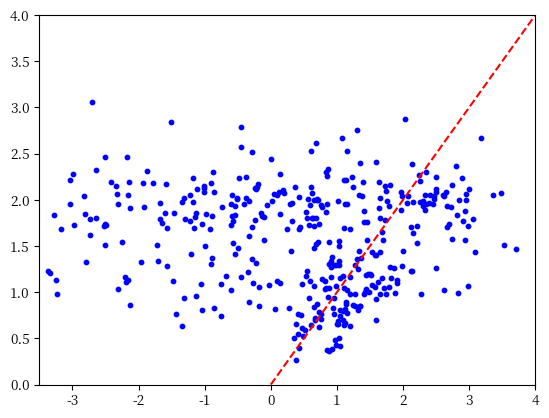

In [49]:
fig, ax = plt.subplots()
ax.scatter(p-q_no_wbloss, et_no_wbloss, c="blue", s=10)
xlim = [-3.5, 4]
ylim = [0, 4]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
line = mlines.Line2D([0, 4], [0, 4], color="red", linestyle="--")
ax.add_line(line)

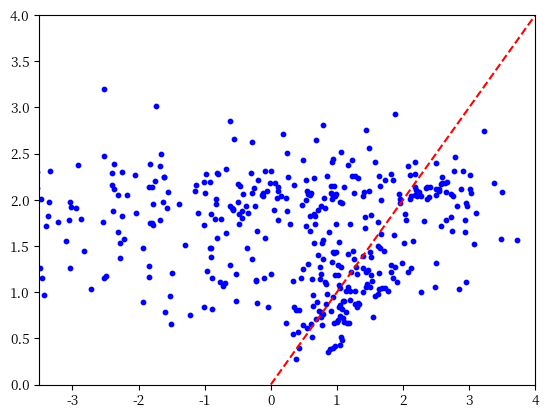

In [50]:
fig, ax = plt.subplots()
ax.scatter(p-q_wbloss, et_wbloss, c="blue", s=10)
xlim = [-3.5, 4]
ylim = [0, 4]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
line = mlines.Line2D([0, 4], [0, 4], color="red", linestyle="--")
ax.add_line(line)